### IDs:
Insert yours IDs to the cell below

ID #1: 227367455

ID #2: 318299559


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
!pip install tqdm matplotlib pandas numpy seaborn scikit-learn scipy

You should consider upgrading via the '/Users/dan/Google Drive/School/IDC/Year III/Semester 1/Statistics and Data Analysis/Exercices/.venv/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
from math import ceil
from IPython.display import display, HTML, Math, Latex
import math
from tqdm.notebook import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

In [5]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (14.0, 8.0)

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [6]:
n = 50

def display_data_visuals(x, y):
    plot = sns.jointplot( x=x, y=y, marker='o')
    plot.fig.suptitle('Jointplot of x and y', va="bottom", fontsize=20)
    df = pd.DataFrame(np.c_[x,y], columns = ['x', 'y'])
    display(HTML(df.to_html()))


#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,x,y
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


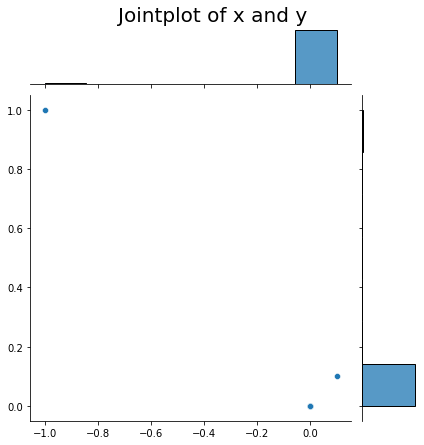

In [7]:
x = np.zeros(n)
y = np.zeros(n)
x[n-2] = 0.1
y[n-2] = 0.1
x[n-1] = -1    #element that we remove
y[n-1] = 1

n_correlation = st.pearsonr(x, y)[0]
n_minus_1_correlation = st.pearsonr(x[:n-1], y[:n-1])[0]

display(Math(rf'Pearson(x, y) = {n_correlation}'))
display(Math(rf'Pearson(x_{{{n-1}}}, y_{{{n-1}}}) =  {n_minus_1_correlation}'))

display_data_visuals(x, y)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

$\Rightarrow \tau(x, y) - \rho(x, y) > 0.45$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,x,y
0,1,25
1,2,26
2,3,27
3,4,28
4,5,29
5,6,30
6,7,31
7,8,32
8,9,33
9,10,34


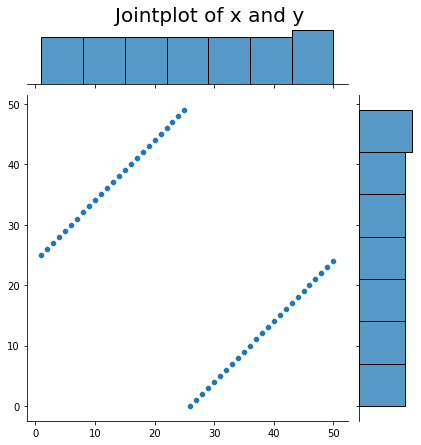

In [8]:
x = np.arange(1, n + 1)
y = np.r_[np.arange(25, 50, 1), np.arange(0, 25, 1)]

ktau_correlation = st.kendalltau(x, y).correlation
srho_correlation = st.spearmanr(x, y).correlation

display(Math(rf'\tau(x,y) = {ktau_correlation}'))
display(Math(rf'\rho(x,y) = {srho_correlation}'))
display(Math(rf'\tau(x,y) - \rho(x,y) = {ktau_correlation - srho_correlation} > 0.45'))

display_data_visuals(x, y)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

$\Rightarrow \tau(x, y) - \rho(x, y) < -0.45$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,x,y
0,1,25
1,2,24
2,3,23
3,4,22
4,5,21
5,6,20
6,7,19
7,8,18
8,9,17
9,10,16


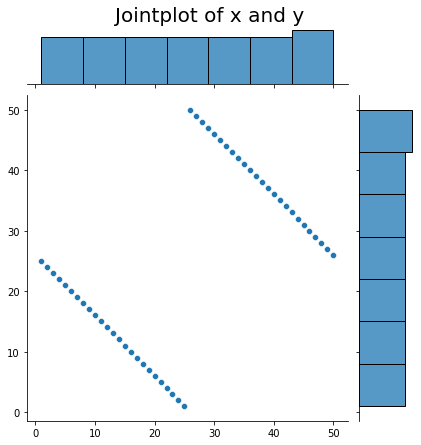

In [9]:
x = np.arange(1, n + 1)
y = np.r_[np.arange(25, 0, -1 ), np.arange(50, 25, -1)]

ktau_correlation = st.kendalltau(x, y).correlation
srho_correlation = st.spearmanr(x, y).correlation

display(Math(rf'\tau(x,y) = {ktau_correlation}'))
display(Math(rf'\rho(x,y) = {srho_correlation}'))
display(Math(rf'\tau(x,y) - \rho(x,y) = {ktau_correlation - srho_correlation} < -0.45'))

display_data_visuals(x, y)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

$\Rightarrow Pearson(x, y) - \rho(x, y) < -0.6$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,x,y
0,1,2
1,2,4
2,3,10
3,4,23
4,5,51
5,6,113
6,7,249
7,8,548
8,9,1207
9,10,2655


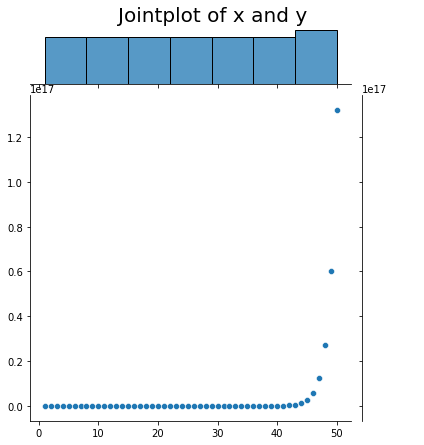

In [10]:
x = np.arange(1, n + 1, dtype=np.int64)
y = np.int64(np.power(2.2, x))

pearson_correlation = st.pearsonr(x, y)[0]
srho_correlation = st.spearmanr(x, y).correlation

display(Math(rf'Pearson(x,y) = {pearson_correlation}'))
display(Math(rf'\rho(x,y) = {srho_correlation}'))
display(Math(rf'Pearson(x,y) - \rho(x,y) = {pearson_correlation - srho_correlation} < -0.6'))

display_data_visuals(x, y)

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,x,y
0,1,49
1,2,48
2,3,47
3,4,46
4,5,45
5,6,44
6,7,43
7,8,42
8,9,41
9,10,40


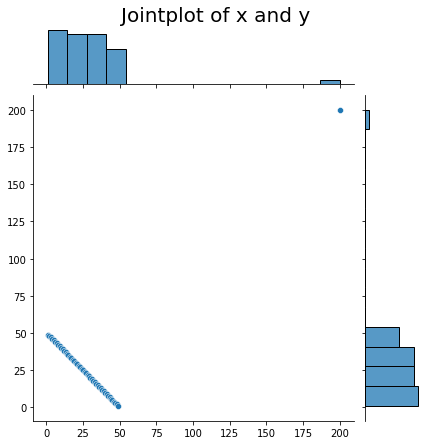

In [11]:
x = np.r_[np.arange(1, n), [200]]
y = np.r_[np.arange(49, 0, -1 ), [200]]
pearson_correlation = st.pearsonr(x, y)[0]
srho_correlation = st.spearmanr(x, y).correlation
display(Math(rf'Pearson(x,y) = {pearson_correlation}'))
display(Math(rf'\rho(x,y) = {srho_correlation}'))
display(Math(rf'Pearson(x,y) - \rho(x,y) = {pearson_correlation - srho_correlation} > 1.2'))

display_data_visuals(x, y)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

This is not possible, in fact we cannot have a difference between tau and rho bigger than 1.2.

If the difference is bigger than 1.2 it means that if one shows a positive correlation then then other has a negative correlation but that can happen with smaller differences.

Clearly $ 0.2 \leq ρ(x,y) \leq 1$

It means that while $\rho$ has a weak or strong positive correlation then $\tau$ has a strong or weak negative correlation respectively.


### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


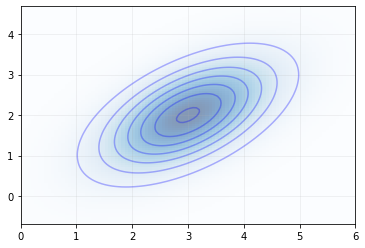

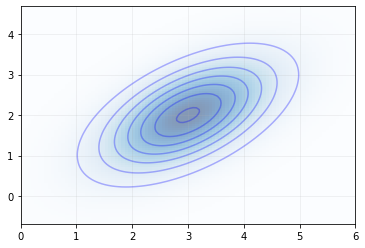

In [12]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape), alpha=0.3, colors='b')
#     ax.axis('equal')
    ax.grid(alpha=0.2)
    return fig
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [13]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [15]:
data_stats = df.describe()
data_stats

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,299.000000,298.000000,297.000000,297.000000,300.000000,301.000000,299.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.682274,0.969799,131.663300,245.966330,0.150000,0.521595,149.565217,0.326733,1.040604,1.399340,0.729373,2.313531,0.544554
std,9.084668,0.466373,1.032678,17.532242,52.117969,0.357668,0.519967,23.008131,0.469794,1.167458,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Information:

Taken from https://archive.ics.uci.edu/ml/datasets/heart+disease :

1. age (numerical)

2. sex (classifier: **1**- male **0**- female)

3. cp: chest pain type (classifier: **1**- typical angina **2**- atypical angina **3**- non-anginal pain **4**- asymptomatic)

4. trestbps: resting blood pressure (numerical)

5. chol: cholesterol (numerical)

6. fbs: fasting blood sugar (numerical)

7. restecg: resting electrocardiographic results (classifier: **0**- normal **1**- having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) **2**- showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: maximum heart rate achieved (numerical)

9. exang: exercise induced (classifier **1**- yes **0**- no)

10. oldpeak: ST depression induced by exercise relative to rest (numerical)

11. slope: the slope of the peak exercise ST segment (classifier:  **1**- upsloping **2**- flat **3**- downsloping)

12. ca: number of major vessels (0-3) colored by fluoroscopy (classifier)

13. thal: thalassemia (classifier: **3**- normal **6**- fixed defect **7**- reversable defect)

14. target

### Preprocessing:
We fill in the missing values as follows:

In [16]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'fbs']

for c in numerical_features:
    df[c].fillna(data_stats[c]['50%'], inplace=True)
for c in categorical_features:
    df[c].fillna(df[c].value_counts().index[0], inplace=True)
    
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.405941,0.686469,0.953795,131.630363,245.848185,0.148515,0.524752,149.610561,0.326733,1.036634,1.399340,0.729373,2.313531,0.544554
std,8.964069,0.464696,1.031544,17.358758,51.604360,0.356198,0.519693,22.858624,0.469794,1.158160,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1) Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean

In [17]:
healthy = df[df['target'] == 0][numerical_features]
disease = df[df['target'] == 1][numerical_features]
alpha = 0.05
p = st.norm.ppf(1 - alpha / 2)
mean_healthy, mean_disease = healthy.mean(), disease.mean()
std_healthy, std_disease = healthy.std(), disease.std()
df_conf_itv = pd.DataFrame()
df_conf_itv['mean_healthy'] = mean_healthy
df_conf_itv['mean_disease'] = mean_disease
df_conf_itv['std_healthy'] = std_healthy
df_conf_itv['std_disease'] = std_disease
df_conf_itv['SE'] = np.sqrt(std_healthy * std_healthy / healthy.shape[0] + std_disease * std_disease / disease.shape[0])
df_conf_itv['low'] = mean_healthy - mean_disease - df_conf_itv['SE'] * p
df_conf_itv['high'] = mean_healthy - mean_disease + df_conf_itv['SE'] * p
df_conf_itv['reject_null_H'] = ~((df_conf_itv['low'] <= 0) & (0 <= df_conf_itv['high']))
df_conf_itv['diseased_pop_bigger_mean'] = mean_healthy < mean_disease

for index, feature in df_conf_itv.iterrows():
    if feature['reject_null_H']:
        print(f"With confidence of 95%, the healthy population's {feature.name} mean" +
              f"is {'lower' if feature['diseased_pop_bigger_mean'] else 'higher'} than the diseased.")
display(df_conf_itv)


With confidence of 95%, the healthy population's age meanis higher than the diseased.
With confidence of 95%, the healthy population's trestbps meanis higher than the diseased.
With confidence of 95%, the healthy population's thalach meanis lower than the diseased.
With confidence of 95%, the healthy population's oldpeak meanis higher than the diseased.


,mean_healthy,mean_disease,std_healthy,std_disease,SE,low,high,reject_null_H,diseased_pop_bigger_mean
age,56.666667,52.515152,7.900229,9.377325,0.992576,2.206102,6.096929,True,False
trestbps,134.398551,129.315152,18.729944,15.810928,2.014242,1.135558,9.031241,True,False
chol,250.572464,241.896970,49.379934,53.220391,5.902163,-2.892533,20.243521,False,False
thalach,139.072464,158.424242,22.516057,19.159520,2.428680,-24.111904,-14.591653,True,True
oldpeak,1.571739,0.589091,1.303336,0.780089,0.126481,0.734750,1.230546,True,False


### 2) Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

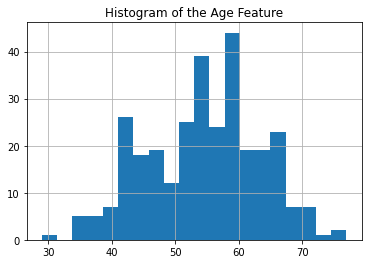

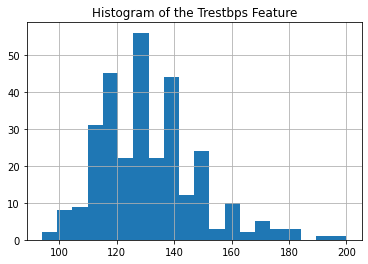

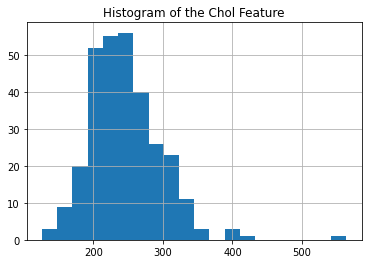

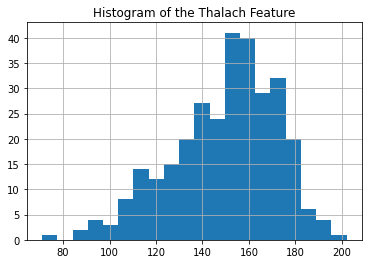

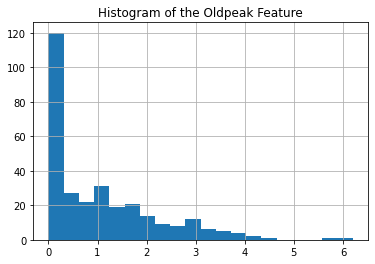

In [18]:
for feature in numerical_features:
    df[feature].hist(bins=20)
    plt.title(f"Histogram of the {feature.capitalize()} Feature")
    plt.show()

It seems that most of the distributions look normal except the last one which might be chi.

We will test a couple of distribution that we will evaluate with MLE.

In [19]:
def best_dist_fit(df, features):
    feature_dist = dict()
    cont_dists = [st.erlang, st.expon, st.norm, st.chi, st.lognorm] # Some distributions we know
    with tqdm(total=len(features) * len(cont_dists)) as pbar:
        for feature in features:
            pbar.set_description(f"Processing the {feature} feature")
            pbar.refresh()
            min_nll = float('inf')
            for dist in cont_dists: 
                fit_args = dist.fit(df[feature]) # default estimation method is MLE
                nll = - np.log(dist.pdf(df[feature], *fit_args)).sum() 
                if nll <= min_nll:
                    min_nll = nll
                    feature_dist[feature] = dist
                pbar.update(1)
    return feature_dist
     
dist_dict = best_dist_fit(df, numerical_features)

  0%|          | 0/25 [00:00<?, ?it/s]

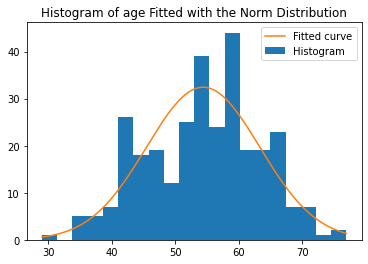

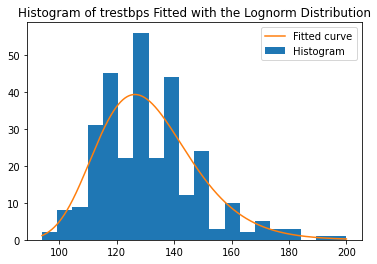

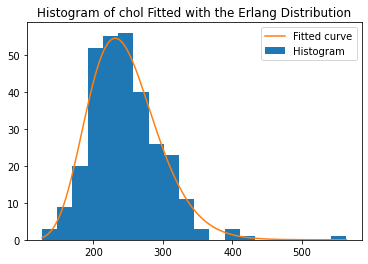

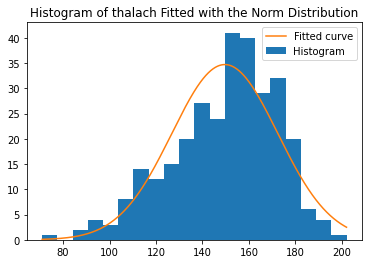

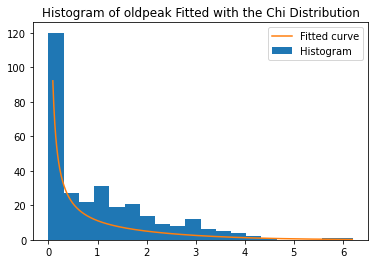

In [20]:
for feature in numerical_features:
    plt.title(f"Histogram of {feature} Fitted with the {dist_dict[feature].name.capitalize()} Distribution")
    x_axis = np.arange(df[feature].min(), df[feature].max(), 0.01)
    _, bins, _ = plt.hist(df[feature], bins=20, label="Histogram")
    diff = bins[1] - bins[0]
    fitted_args = dist_dict[feature].fit(df[feature])
    best_fit_line = dist_dict[feature].pdf(x_axis, *fitted_args)
    plt.plot(x_axis[best_fit_line < 1], len(df) * diff * best_fit_line[best_fit_line < 1], label="Fitted curve")
    plt.legend()
    plt.show()

We tried a couple of distribution that we learned over the degree and used the built-in MLE algorithms of the distributions and scored them by their negative log-likelihood.

As expected, the first 4 distributions look very similar or were fitted to be normal, while the last one seems to be chi.

### 3) For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

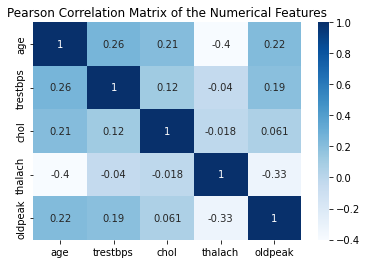

In [21]:
p_corr = df[numerical_features].corr('pearson')
sns.heatmap(p_corr, annot=True, cmap='Blues')
plt.title("Pearson Correlation Matrix of the Numerical Features")
plt.show()

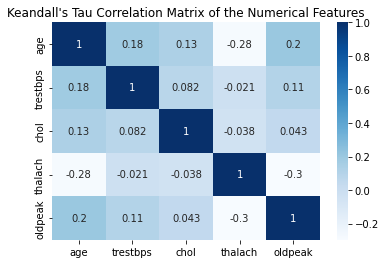

In [22]:
kt_corr = df[numerical_features].corr(method ='kendall')
sns.heatmap(kt_corr, annot=True, cmap='Blues')
plt.title("Keandall's Tau Correlation Matrix of the Numerical Features")
plt.show()

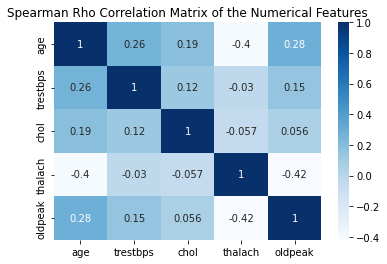

In [23]:
sr_corr = df[numerical_features].corr('spearman')
sns.heatmap(sr_corr, annot=True, cmap='Blues')
plt.title("Spearman Rho Correlation Matrix of the Numerical Features")
plt.show()

Clearly, we can see that there are no strong relations but we take the correlations that are moderately stong ( $> 0.4$ )

In [24]:
def find_strong_corr(p_corr, kt_corr, sr_corr):
    strong_corr = set()
    for corr in [p_corr, kt_corr, sr_corr]:
        strong = corr[abs(corr) >= 0.4]
        for i in strong:
            for j in strong:
                if i < j and not np.isnan(strong[i][j]):
                    strong_corr.add((i,j))
    return strong_corr

strong_corr = find_strong_corr(p_corr, kt_corr, sr_corr)
print(f'Strong correlation pairs: {strong_corr}')

Strong correlation pairs: {('oldpeak', 'thalach'), ('age', 'thalach')}


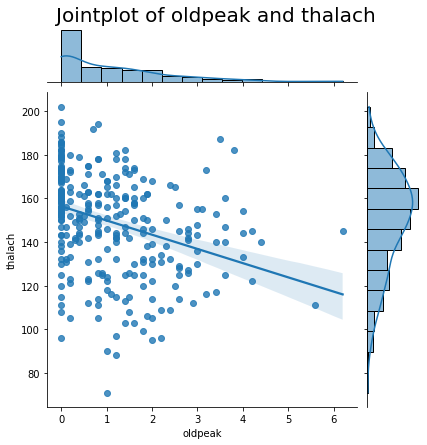

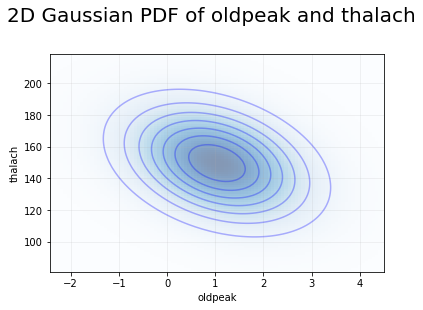

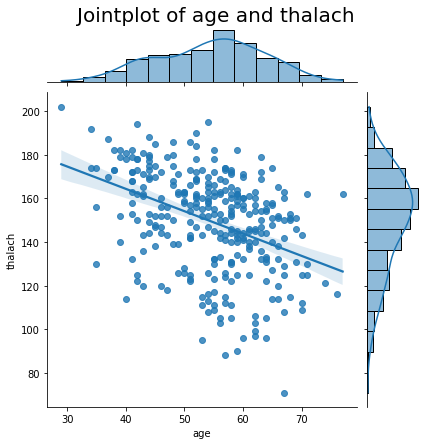

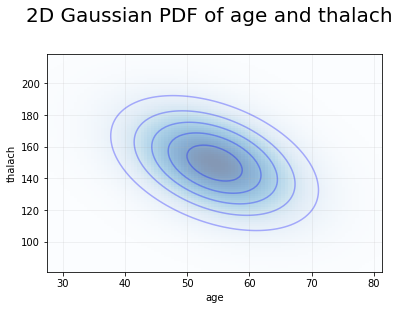

In [25]:
for feature_1, feature_2 in strong_corr:
    sns.jointplot(df[feature_1], df[feature_2], kind='reg')
    plt.suptitle(f"Jointplot of {feature_1} and {feature_2}", va="bottom", fontsize=20)
    features = df[[feature_1, feature_2]]
    mean, cov = np.mean(features, axis=0), np.cov(features.T)
    fig = plot_2d_Gaussian_pdf(mean, cov)
    plt.suptitle(f"2D Gaussian PDF of {feature_1} and {feature_2}", va="bottom", fontsize=20)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)

### 4) Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

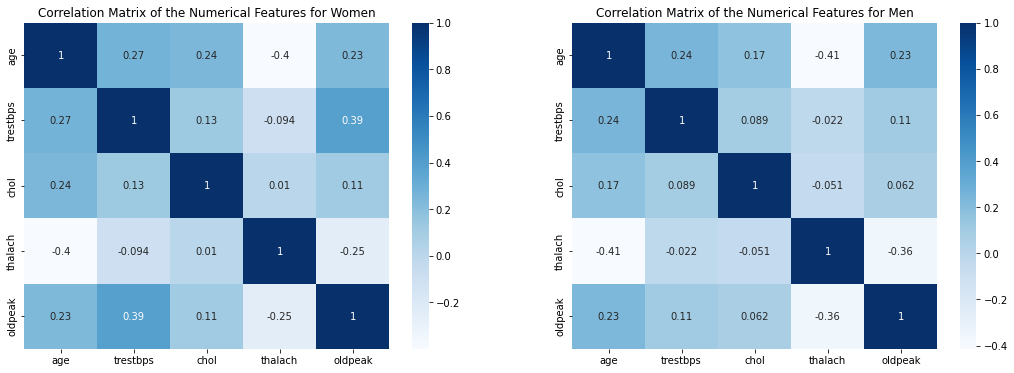

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(df[(df['sex'] == 0)][numerical_features].corr(), ax=ax[0], annot=True, cmap='Blues')
ax[0].set_title( "Correlation Matrix of the Numerical Features for Women")

sns.heatmap(df[(df['sex'] == 1)][numerical_features].corr(), ax=ax[1], annot=True, cmap='Blues')
ax[1].set_title("Correlation Matrix of the Numerical Features for Men")
plt.show()

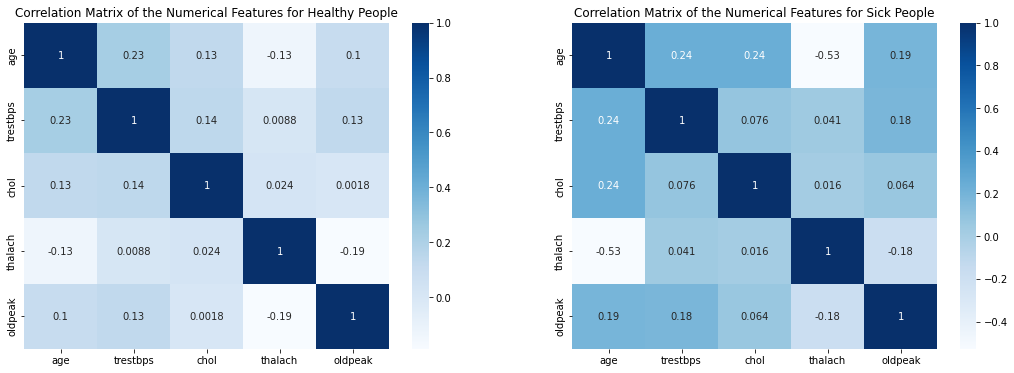

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(df[(df['target'] == 0)][numerical_features].corr(), ax=ax[0], annot=True, cmap='Blues')
ax[0].set_title( "Correlation Matrix of the Numerical Features for Healthy People")

sns.heatmap(df[(df['target'] == 1)][numerical_features].corr(), ax=ax[1], annot=True, cmap='Blues')
ax[1].set_title("Correlation Matrix of the Numerical Features for Sick People")
plt.show()

{('oldpeak', 'trestbps'): ((0.10866734824738594, 0.11819177735866133), (0.3894818769616579, 9.572956503027135e-05))}


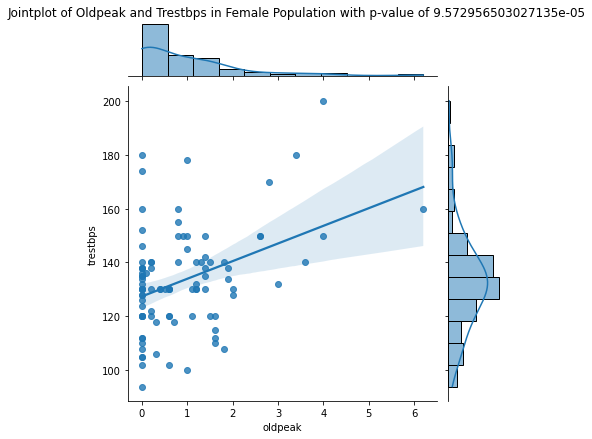

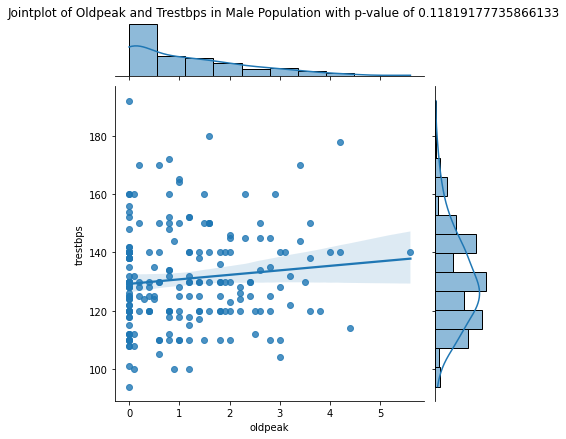

In [29]:
def significant_correlation_difference(split_data_1, split_data_2, threashold = 0.35, diff = 0.2):
    """
    Finds any significant correlation by putting a threshold on what is required to be significant 
    And finds a significance of correlation if the difference between the 2 samples is at least diff
    """
    corrs = dict()
    for feature_1 in numerical_features:
        for feature_2 in numerical_features:
            if feature_1 < feature_2:
                corr_partition_1 = st.pearsonr(split_data_1[feature_1], split_data_1[feature_2])
                corr_partition_2 = st.pearsonr(split_data_2[feature_1], split_data_2[feature_2])
                if 1 + diff > abs(corr_partition_1[0] - corr_partition_2[0]) > diff and \
                (abs(corr_partition_1[0]) > threashold or abs(corr_partition_2[0]) > threashold):
                    corrs[(feature_1, feature_2)] = (corr_partition_1, corr_partition_2)
    return corrs

df_males = df[df['sex']==1]
df_females = df[df['sex']==0]

significant_correlations = significant_correlation_difference(df_males, df_females, threashold=0.35, diff = 0.25 )
print(significant_correlations)
for pair in significant_correlations:
    ax = sns.jointplot( df_females[pair[0]], df_females[pair[1]], kind='reg')
    pval_female = significant_correlations[pair][1][1]
    ax.fig.suptitle(f"Jointplot of {pair[0].capitalize()} and {pair[1].capitalize()} in Female Population with p-value of {pval_female}", va='bottom')
    ax = sns.jointplot( df_males[pair[0]], df_males[pair[1]], kind='reg')
    pval_male = significant_correlations[pair][0][1]
    ax.fig.suptitle(f"Jointplot of {pair[0].capitalize()} and {pair[1].capitalize()} in Male Population with p-value of {pval_male}", va='bottom')

{('age', 'thalach'): ((-0.5275420051360303, 3.329564537668829e-13), (-0.13437376695371536, 0.11611039893368287))}


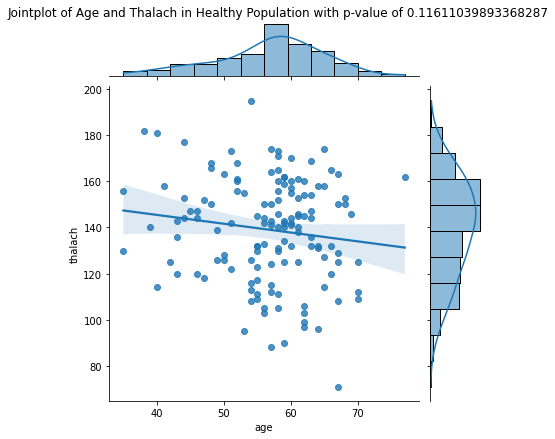

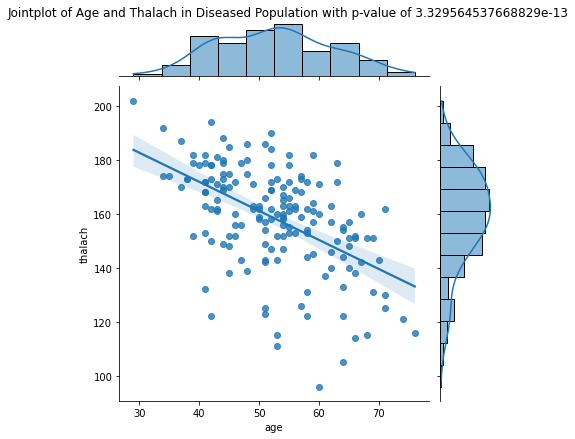

In [30]:
df_healthy = df[df['target']==0]
df_diseased = df[df['target']==1]

significant_correlations = significant_correlation_difference( df_diseased, df_healthy ,threashold=0.35, diff = 0.25 )
print(significant_correlations)
for pair in significant_correlations:
    ax = sns.jointplot( df_healthy[pair[0]], df_healthy[pair[1]], kind='reg')
    pval_healthy = significant_correlations[pair][1][1]
    ax.fig.suptitle(f"Jointplot of {pair[0].capitalize()} and {pair[1].capitalize()} in Healthy Population with p-value of {pval_healthy}", va='bottom')
    ax = sns.jointplot( df_diseased[pair[0]], df_diseased[pair[1]], kind='reg')
    pval_diseased = significant_correlations[pair][0][1]
    ax.fig.suptitle(f"Jointplot of {pair[0].capitalize()} and {pair[1].capitalize()} in Diseased Population with p-value of {pval_diseased}", va='bottom')

### 5) For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

In [31]:
print(f"Minimum age is {data_stats.age['min']} and maximum age is {data_stats.age['max']}")

Minimum age is 29.0 and maximum age is 77.0


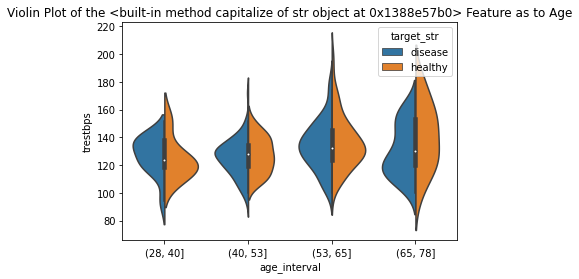

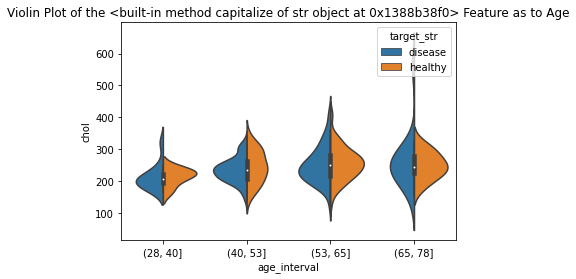

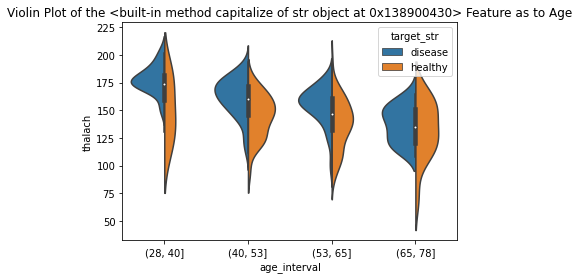

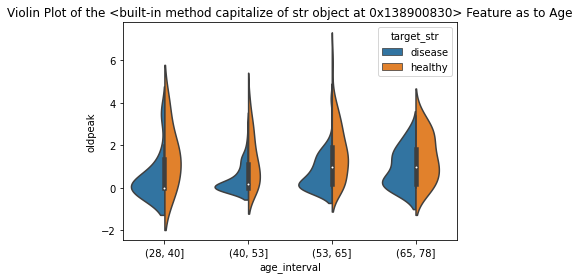

In [32]:
bins = np.linspace(data_stats.age['min'] - 1, data_stats.age['max'] + 1, 5, dtype = int)
df_violin = df[numerical_features + ['target']]
df_violin['target_str'] =  df_violin['target'].apply(lambda x: 'healthy' if x==0 else 'disease')
df_violin['age_interval'] = pd.cut(x=df.age, bins=bins)
for feature in numerical_features:
    if feature == 'age':
        continue
    ax = sns.violinplot(x='age_interval', y=feature, data=df_violin, hue='target_str', split=True)
    ax.set_title(f'Violin Plot of the {feature.capitalize} Feature as to Age')
    plt.show()

### 6) Suggest, state and address at least one original question.

We have only looked at the correlations using 3 variables.

Is it possible that with 4 features we get something that has a very strong correlation?

<br>

Now let's consider 4 variables: 2 features, age and target.

We will make age into a categorical feature 

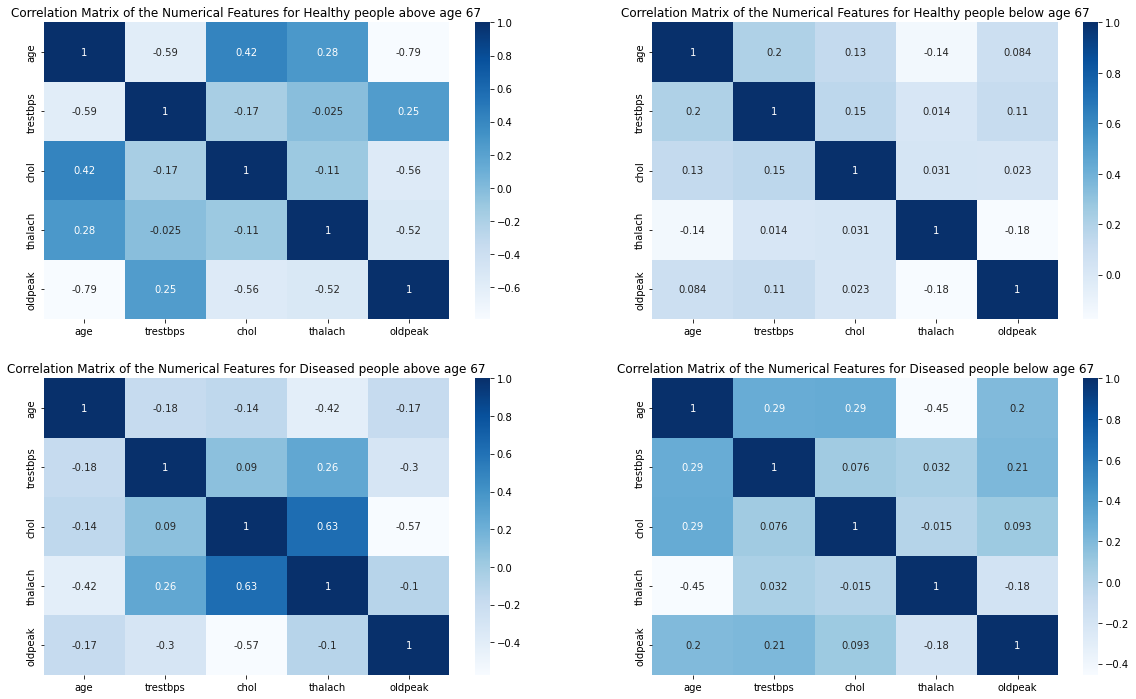

In [33]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

health_above = df[(df['age'] > 67) & (df['target'] == 0)]
health_below = df[(df['age'] <= 67) & (df['target'] == 0)]
diseased_above = df[(df['age'] > 67) & (df['target'] == 1)]
diseased_below = df[(df['age'] <= 67) & (df['target'] == 1)]

sns.heatmap(health_above[numerical_features].corr(), ax=ax1, annot=True, cmap='Blues')
ax1.set_title( "Correlation Matrix of the Numerical Features for Healthy people above age 67")

sns.heatmap(health_below[numerical_features].corr(), ax=ax2, annot=True, cmap='Blues')
ax2.set_title("Correlation Matrix of the Numerical Features for Healthy people below age 67")

sns.heatmap(diseased_above[numerical_features].corr(), ax=ax3, annot=True, cmap='Blues')
ax3.set_title( "Correlation Matrix of the Numerical Features for Diseased people above age 67")

sns.heatmap(diseased_below[numerical_features].corr(), ax=ax4, annot=True, cmap='Blues')
ax4.set_title("Correlation Matrix of the Numerical Features for Diseased people below age 67")
plt.show()

We can clearly see that for sick people above the age of 67 there is a high correlation between chol and thalach.

This is not true for the elderly who are healthy.

We will use the same tests as previously in this exercise and evaluate the p-test to see that it is true.

{('age', 'trestbps'): ((-0.5934511596867219, 0.16012182777605966), (-0.1753789063471547, 0.6279424222122569)), ('age', 'chol'): ((0.42329881193538516, 0.3439975661909919), (-0.14214760500492077, 0.6952593030428065)), ('age', 'thalach'): ((0.27657092738514844, 0.5482278483342049), (-0.4172930728549143, 0.23020646840256595)), ('age', 'oldpeak'): ((-0.7921388314151254, 0.03370779988796852), (-0.1749382814479632, 0.6288202672977785)), ('chol', 'thalach'): ((-0.11293056380710828, 0.809503290855362), (0.6265816770359003, 0.05256277626691969)), ('oldpeak', 'thalach'): ((-0.5235107835292543, 0.22786139036720773), (-0.10200536205754393, 0.7791705701593293))}


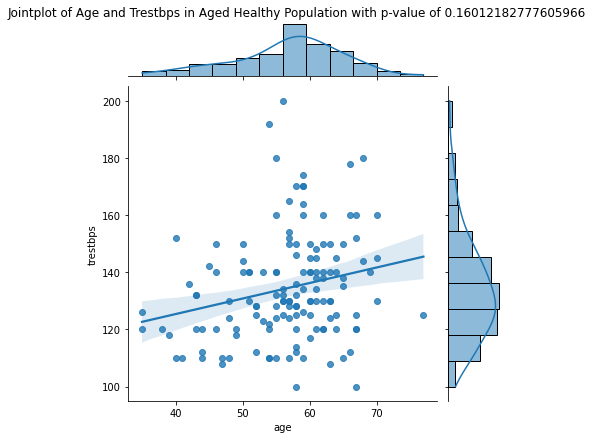

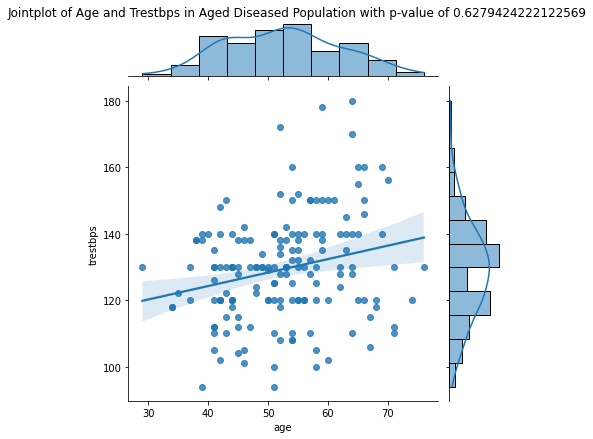

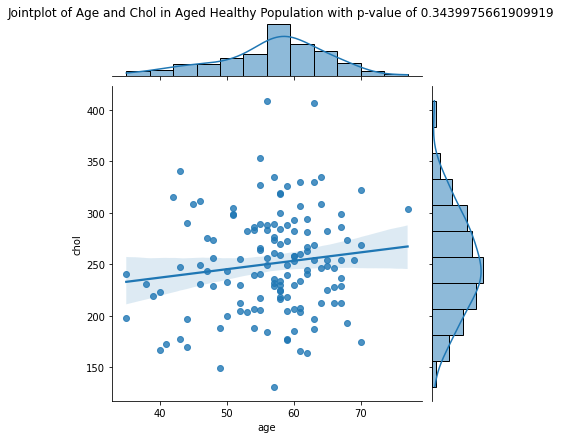

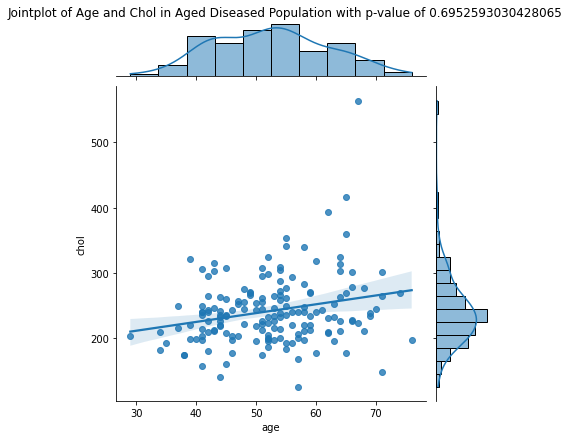

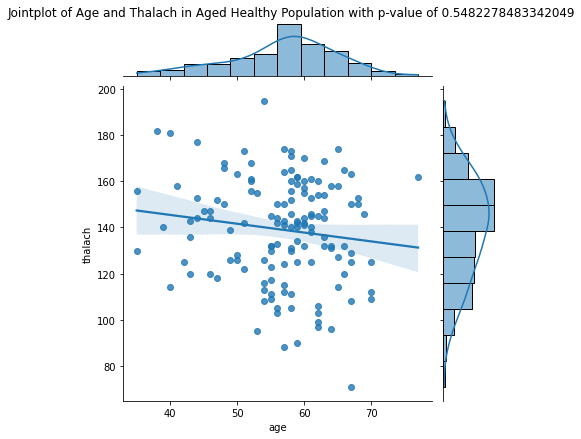

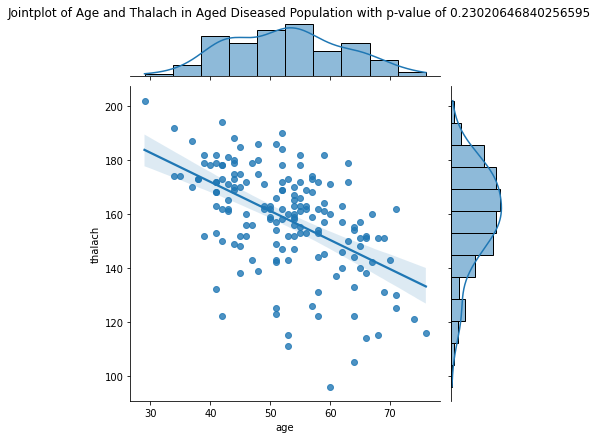

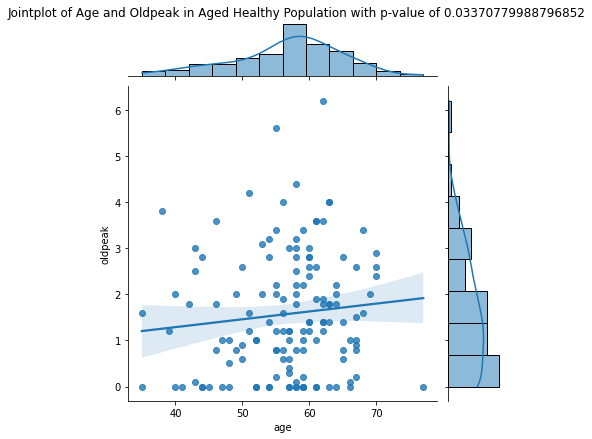

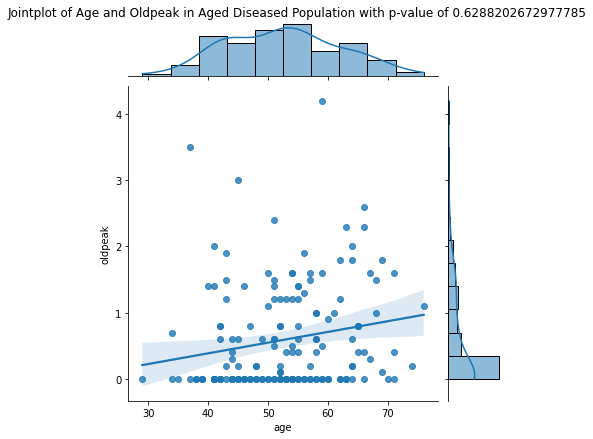

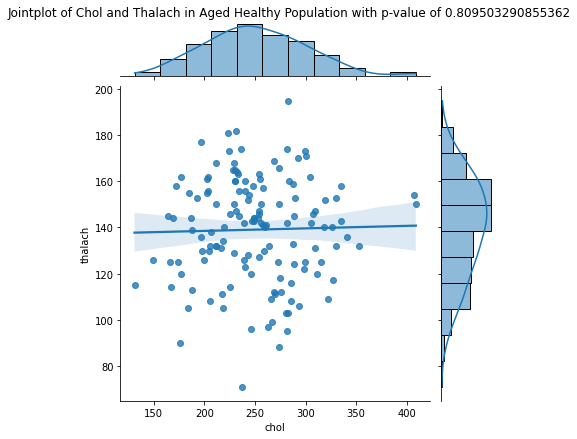

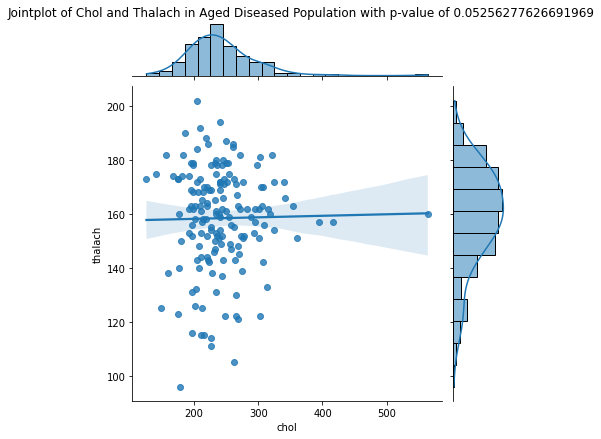

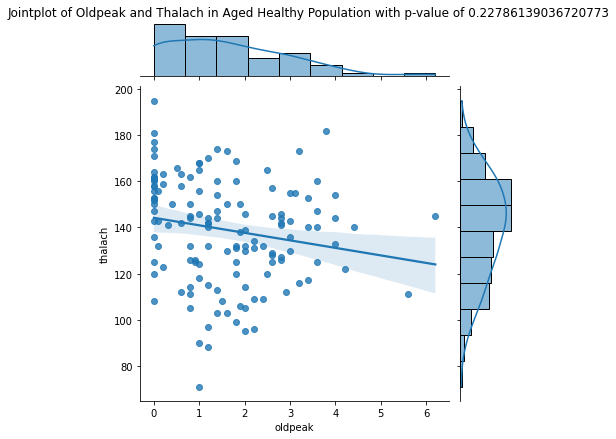

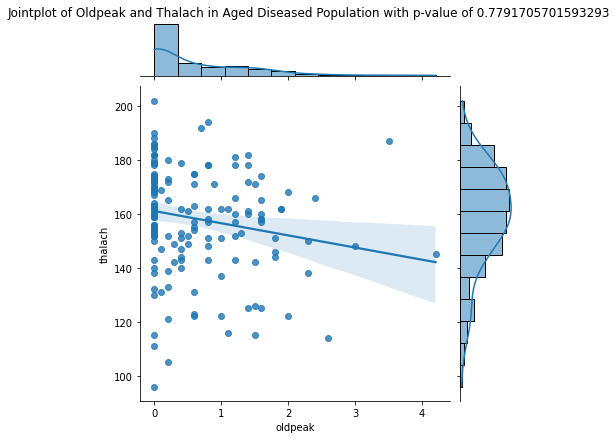

In [35]:
df_healthy = df[df['target']==0]
df_diseased = df[df['target']==1]

significant_correlations = significant_correlation_difference( health_above, diseased_above ,threashold=0.35, diff = 0.25 )
print(significant_correlations)
for pair in significant_correlations:
    ax = sns.jointplot( df_healthy[pair[0]], df_healthy[pair[1]], kind='reg')
    pval_healthy = significant_correlations[pair][0][1]
    ax.fig.suptitle(f"Jointplot of {pair[0].capitalize()} and {pair[1].capitalize()} in Aged Healthy Population with p-value of {pval_healthy}", va='bottom')
    ax = sns.jointplot( df_diseased[pair[0]], df_diseased[pair[1]], kind='reg')
    pval_diseased = significant_correlations[pair][1][1]
    ax.fig.suptitle(f"Jointplot of {pair[0].capitalize()} and {pair[1].capitalize()} in Aged Diseased Population with p-value of {pval_diseased}", va='bottom')

We can see that we have a p-value for our pair of feature of interest of $0.053 > 0.05$ so we cannot reject the null hypothesis. However, the p-value is very close and maybe getting more data would be able to enhance the p-value.

On the other hand, in the process we have found an interesting pair ('age', 'oldpeak') which has a very strong negative correlation and a p-value smaller than 0.05 so we can reject the null-hypothesis.

This result makes sense because as we age we do less exercise and therefore the healthier population would be prone to have better results overall.

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

Let $X \sim N(\mu,\sigma^2)$, $Y = e^{X}$

$\lim_{x\to\infty} e^{tx}P(Y > x) $

$= \lim_{x\to\infty} e^{tx}(1-P(Y \leq x)) $

$= \lim_{x\to\infty} e^{tx}(1-P(e^X \leq x)) $

$= \lim_{x\to\infty} e^{tx}(1-P(X \leq ln x)) $

$= \lim_{x\to\infty} e^{tx}(1-\Phi(ln x))$

$= \lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}}$

$= \lim_{x\to\infty} \frac{\phi(ln x)}{x \cdot t \cdot e^{-tx}}$ By l'Hop.

$= \lim_{x\to\infty} \frac{\frac{1}{x \sqrt{2\pi}}e^{-\frac{1}{2} (ln x)^2}}{x \cdot t \cdot e^{-tx}}$

$= \frac{1}{t \cdot \sqrt{2\pi}} \cdot \lim_{x\to\infty} \frac{e^{tx}} {e^{\frac {(ln x)^2}{2}} \cdot x^2 }$

$ > \frac{1}{t} \cdot \lim_{x\to\infty} \frac{e^{tx}} {e^{\sqrt{x}} \cdot x^2 } $ by lemma 1

$ > \frac{1}{t} \cdot \lim_{x\to\infty} \frac{e^{tx - \sqrt{x}}}{x^2}$

$= t \cdot \infty $ by 2 l'Hop.

$= \infty \square$

<br>

Lemma 1: $\lim_{x\to\infty} \frac{\sqrt{x}}{ln^2(x)} = \infty$

$\lim_{x\to\infty} \frac{\sqrt{x}}{ln^2(x)}$

$ = \lim_{x\to\infty} \frac{x^{1/4} \cdot x^{1/4}}{ln^2(x)}$

$ = \lim_{x\to\infty} \frac{ln^2(e^{x/4})}{ln^2(x)}$

$ = \infty$ since $ \lim_{x\to\infty} \frac{e^{x/4}}{x} = \infty $ by l'Hop. $\square$

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

$P(X_1 < X_2)$

$ = \int_{-\infty}^{\infty} P(X_1 < X_2 | X_2 = y) \cdot f_Y(y) dy = \int_{0}^{\infty} P(X_1 < X_2 | X_2 = y) \cdot f_{X_2}(y) dy $

$ = \int_{0}^{\infty} F_{X_1}(y) \cdot f_{X_2}(y) dy$

$ = \int_{0}^{\infty} (1 - e^{-\lambda_1 \cdot y}) \cdot \lambda_2 e^{-\lambda_2 \cdot y} dy$

$ = \int_{0}^{\infty}\lambda_2 e^{-\lambda_2 \cdot y} - e^{-\lambda_1 \cdot y} \cdot \lambda_2 e^{-\lambda_2 \cdot y} dy$

$ = \int_{0}^{\infty}  \lambda_2 e^{-\lambda_2 \cdot y} dy - \int_{0}^{\infty} e^{-\lambda_1 \cdot y} \cdot \lambda_2 e^{-\lambda_2 \cdot y} dy$

$ = \lambda_2 \cdot \int_{0}^{\infty}   e^{-\lambda_2 \cdot y} dy - \lambda_2 \cdot \int_{0}^{\infty} e^{-(\lambda_1 + \lambda_2 ) \cdot y}dy$

$ = \lambda_2 \cdot \frac{1}{\lambda_2} \cdot [- e^{-\lambda_2 \cdot y}]_{0}^{\infty} 
- \frac{\lambda_2}{\lambda_1 + \lambda_2} \cdot [- e^{-(\lambda_1 + \lambda_2 ) \cdot y}]_{0}^{\infty} $

$ = 1 - (\frac{\lambda_2}{\lambda_1 + \lambda_2})$

$ = \frac{\lambda_1}{\lambda_1 + \lambda_2} \square$


### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of $X_i$ in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

$$\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}$$

In [36]:
T = np.array([[0.4, 0.2, 0.1, 0.0, 0.1, 0.2], 
              [0.2, 0.4, 0.2, 0.1, 0.0, 0.1], 
              [0.1, 0.2, 0.4, 0.2, 0.1, 0.0], 
              [0.0, 0.1, 0.2, 0.4, 0.2, 0.1], 
              [0.1, 0.0, 0.1, 0.2, 0.4, 0.2], 
              [0.2, 0.1, 0.0, 0.1, 0.2, 0.4]])

T_latex = r"""\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}"""

pi_0 = np.ones(6) / 6

pi_0_latex = r"\begin{pmatrix} \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} &  \frac{1}{6} &  \frac{1}{6} \end{pmatrix} "

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [37]:
display(Math(f"{pi_0_latex} \cdot {T_latex} = {pi_0 @ T}"))

<IPython.core.display.Math object>

In [38]:
print(f"The mean of the distribution is: {pi_0 @ np.arange(1, pi_0.shape[0] + 1)}")

The mean of the distribution is: 3.5


From the above, we see that $E(X_0) = 3.5$ 

Since $\pi_1 = \pi_0 \cdot T = \pi_0 \Rightarrow \forall i \in \mathbb{N}, \pi_i = \pi_0 $

Therefore, $\pi_0$ is stationary.

This implies that $\forall i \in \mathbb{N}, E(X_i) = E(X_0) = 3.5$

1)

$ E(\sum_{i=0}^{29}\frac{X_i}{30}) = \sum_{i=0}^{29}\frac{E(X_i)}{30} = \sum_{i=0}^{29}\frac{E(X_0)}{30} 
= 30 \cdot \frac{E(X_0)}{30} = E(X_0) = 3.5$

In [39]:
def _random_trajectory(matrix, p, length):
    states = np.arange(1, p.shape[0] + 1, dtype=int)
    history = np.zeros(length, dtype=int)
    history[0] = np.random.choice(states, p=p)
    for current, previous in zip(range(1,length), range(0,length)):
        history[current] = np.random.choice(states, p=T[history[previous] - 1])
    return history

def generate_random_trajectory( matrix, p, length, nb_trials):    
    rand_results = np.array([_random_trajectory(matrix, p, length) for _ in range(nb_trials)])
    return rand_results

The mean of the sampling is 3.4985
The std of the sampling is 0.49956311468677866


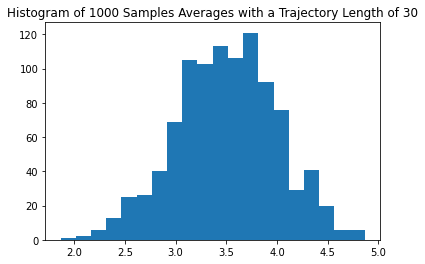

In [40]:
samples_len_30 = generate_random_trajectory(T, pi_0, 30, 1000)
means_len_30 = samples_len_30.mean(axis=1)
plt.hist(means_len_30, bins=20)
plt.title('Histogram of 1000 Samples Averages with a Trajectory Length of 30')
print(f"The mean of the sampling is {means_len_30.mean()}")
print(f"The std of the sampling is {means_len_30.std()}")
plt.show()

This distribution seems to look normal

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

Similar to the previous question, we expect the average value of all 500 numbers in a trajectory to be 3.5

In [41]:
samples_len_500 = generate_random_trajectory(T, pi_0, 500, 1000)

The mean of the sampling is 3.490434
The std of the sampling is 0.12190061379664993


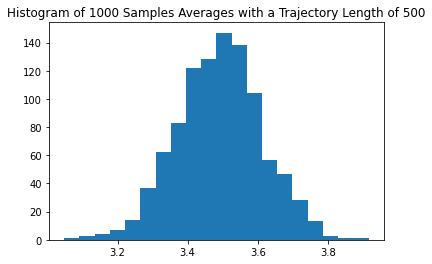

In [42]:
means_len_500 = samples_len_500.mean(axis=1)
plt.hist(means_len_500, bins=20)
plt.title('Histogram of 1000 Samples Averages with a Trajectory Length of 500')
print(f"The mean of the sampling is {means_len_500.mean()}")
print(f"The std of the sampling is {means_len_500.std()}")
plt.show()

This distribution seems to look normal again.

Since there are more $X_i$'s, there are more samples within a trajectory providing converging, smaller std.

#### 4.C
Draw normal fit curves on your two histograms.

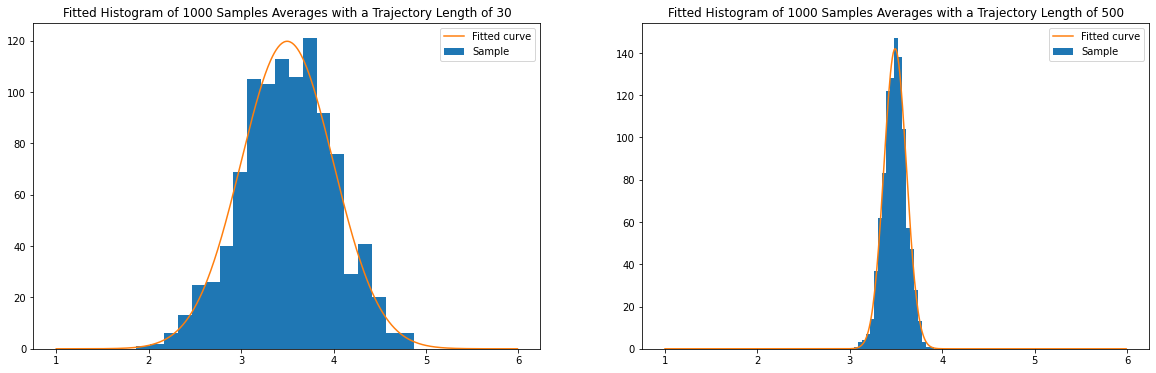

In [43]:
x_axis = np.arange(1, 6, 0.01)
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

_, bins, _ = ax[0].hist(means_len_30, bins=20, label="Sample")
diff = bins[1] - bins[0]
ax[0].plot(x_axis, diff * len(means_len_30)  * st.norm.pdf(x_axis, means_len_30.mean(), means_len_30.std()), label="Fitted curve")
ax[0].set_title('Fitted Histogram of 1000 Samples Averages with a Trajectory Length of 30')
ax[0].legend()


_, bins, _ = ax[1].hist(means_len_500, bins=20, label="Sample")
diff = bins[1] - bins[0]
ax[1].plot(x_axis, diff * len(means_len_500) * st.norm.pdf(x_axis, means_len_500.mean(), means_len_500.std()), label="Fitted curve")
ax[1].set_title('Fitted Histogram of 1000 Samples Averages with a Trajectory Length of 500')
ax[1].legend()

plt.show()

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

Let $n$ be the number of states in the distribution.

$E(X_0X_i) = \sum_{m \in [n^2]} m P(X_0X_i = m)$

$ = {\sum_{j=1}^{n}\sum_{k=1}^{n} j \cdot k \cdot P(X_0 = j, X_i = k)} $

$ = {\sum_{j=1}^{n}\sum_{k=1}^{n} j \cdot k \cdot P(X_0 = j) \cdot P(X_i = k | X_0 = j)} $

$ = {\sum_{j=1}^{n}\sum_{k=1}^{n} j \cdot k \cdot P(X_0 = j) \cdot T^i[j,k]}$

In [44]:
def compute_cov( pi_0: np.array, T: np.array, nb_iter: int) -> np.array :
    states = np.arange(1, pi_0.shape[0] + 1, dtype=int)
    history = np.empty(nb_iter)
    T_pow = np.identity(len(T))
    e_x0 = states @ pi_0
    for i in range(0, nb_iter):
        T_pow = T_pow @ T
        xi_dist = pi_0 @ T_pow
        e_xi = states @ xi_dist 
        e_x0xi = sum([(i + 1) * (j + 1) * pi_0[i] * T_pow[i][j] for i in range(len(T)) for j in range(len(T))])
        cov_0_i = e_x0xi - e_x0 * e_xi
        history[i] = cov_0_i
    return history

compute_cov( pi_0, T, nb_iter=500)

array([ 1.11666667e+00,  5.16666667e-01,  2.52666667e-01,  1.25466667e-01,
        6.25866667e-02,  3.12666667e-02,  1.56282667e-02,  7.81314667e-03,
        3.90637867e-03,  1.95315067e-03,  9.76567627e-04,  4.88282275e-04,
        2.44140830e-04,  1.22070353e-04,  6.10351644e-05,  3.05175798e-05,
        1.52587894e-05,  7.62939460e-06,  3.81469728e-06,  1.90734863e-06,
        9.53674320e-07,  4.76837164e-07,  2.38418583e-07,  1.19209290e-07,
        5.96046448e-08,  2.98023242e-08,  1.49011612e-08,  7.45058237e-09,
        3.72529207e-09,  1.86264693e-09,  9.31320798e-10,  4.65661287e-10,
        2.32828867e-10,  1.16415322e-10,  5.82094373e-11,  2.91038305e-11,
        1.45501389e-11,  7.27773397e-12,  3.63797881e-12,  1.82076576e-12,
        9.07718345e-13,  4.51194637e-13,  2.27373675e-13,  1.11910481e-13,
        5.86197757e-14,  2.84217094e-14,  1.77635684e-14,  1.06581410e-14,
        3.55271368e-15, -1.77635684e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

Clearly the result converges to a value close to 0.

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.

$P(x_1 \leq m, ..., x_k \leq m) = \prod_{i=1}^{k}P(x_i \leq m)$ since all x's are sampled independently.

In particular $\prod_{i=1}^{k}P(x_i \leq m) = (\dfrac{1}{2})^k = \dfrac{1}{2^k} \wedge \prod_{i=k+1}^{n}P(x_i > m) = (\dfrac{1}{2})^{n-k} $ by the given.

We can see that we can choose k of the n variable each time that we set to a value bigger than 0.5 such that we see that R is binomial.
 
$R \sim B(n, \frac{1}{2})$

$ x_{\lambda (n)} \le m \Rightarrow x_{1} \le m \wedge ... \wedge x_{\lambda (n) - 1} \le m$

Thus we can reduce the problem as $P(R \leq \lambda(n)) < 1 - 0.95 = 0.05$

We can thus write an algorithm in O(n) that runs as follows:

In [45]:
def lambda_func_brute_force(n = 100, p = 0.5, bound = 0.95):
    k = 0
    binom = st.binom(n, p)
    cdf = binom.pmf(k)
    while cdf < 0.05:
        k += 1
        cdf += binom.pmf(k)
    return k - 1


However, since there are enough samples we can use the CLT to get good approximations for smaller n's and very accurate ones for bigger n's as follows:

$R \sim N(np, np(1-p)), Z \sim N(0,1)$

$R = Znp(1-p) + np$

We want to find $P(Z=z) = 1 - 0.095 = 0.05$
And we get $\lambda(n) = \lfloor znp(1-p) + np \rfloor $

However we need to correct of the fact that we used a continuous function and use a better approximation:
$\lfloor znp(1-p) + np - \frac{1}{2} \rfloor $ however this might undershoot $\lambda(n)$

So we can use $\lambda(n) \leq \lfloor znp(1-p) + np \rfloor$ and decrement $\lambda(n)$ from there if needed and thus we obtain an O(1) algorithm!


In [46]:
def lambda_func(n = 100, p = 0.5, bound = 0.95):
    z = st.norm.ppf(1 - bound)
    lambda_n = math.floor(z * math.sqrt(n * p * (1 - p)) + n * p) 
    res_in_bound = 1 - st.binom(n, 0.5).cdf(lambda_n)
    res_not_in_bound = 1 - st.binom(n, 0.5).cdf(lambda_n + 1)
    if res_not_in_bound < 0.95 and res_in_bound > 0.95:
        return lambda_n
    else:
        return lambda_n - 1

n = 293092039
lambda_n = lambda_func(n = n)
res_in_bound = 1 - st.binom(n, 0.5).cdf(lambda_n)
res_not_in_bound = 1 - st.binom(n, 0.5).cdf(lambda_n + 1)
print(f"lambda({n}) = {lambda_n} for which we see P(x_{lambda_n} ≤ m) ≥ {res_in_bound} ≥ 0.95")
print(f"And we see P(x_{lambda_n + 1} ≤ m) ≤ {res_not_in_bound} ≤ 0.95")

lambda(293092039) = 146531939 for which we see P(x_146531939 ≤ m) ≥ 0.9500013217317113 ≥ 0.95
And we see P(x_146531940 ≤ m) ≤ 0.9499892722232853 ≤ 0.95


### The following are just tests to see that the brute force and the CLT methods agree!

In [47]:
for n in range(100, 200, 20):
    lambda_n = lambda_func(n = n)
    res_in_bound = 1 - st.binom(n, 0.5).cdf(lambda_n)
    res_not_in_bound = 1 - st.binom(n, 0.5).cdf(lambda_n + 1)
    print(res_not_in_bound < 0.95 and res_in_bound > 0.95)
    print(f"lambda({n}) = {lambda_n} for which we see P(x_{lambda_n} ≤ m) ≥ {res_in_bound} ≥ 0.95")
    print(f"And we see P(x_{lambda_n + 1} ≤ m) ≤ {res_not_in_bound} ≤ 0.95")

True
lambda(100) = 41 for which we see P(x_41 ≤ m) ≥ 0.9556869599429662 ≥ 0.95
And we see P(x_42 ≤ m) ≤ 0.9333946903963932 ≤ 0.95
True
lambda(120) = 50 for which we see P(x_50 ≤ m) ≥ 0.9587962603362368 ≥ 0.95
And we see P(x_51 ≤ m) ≤ 0.9398360861306712 ≤ 0.95
True
lambda(140) = 59 for which we see P(x_59 ≤ m) ≥ 0.9622245856236717 ≥ 0.95
And we see P(x_60 ≤ m) ≤ 0.9460061850082236 ≤ 0.95
True
lambda(160) = 69 for which we see P(x_69 ≤ m) ≥ 0.9517153233041099 ≥ 0.95
And we see P(x_70 ≤ m) ≤ 0.9335887334262373 ≤ 0.95
True
lambda(180) = 78 for which we see P(x_78 ≤ m) ≥ 0.9569063433356522 ≥ 0.95
And we see P(x_79 ≤ m) ≤ 0.9413606734462698 ≤ 0.95


In [48]:
for n in range(100,2000):
    if lambda_func(n = n) != lambda_func_brute_force(n = n):
        print(n)